### Libraries

In [542]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement 

In [356]:
'customerID'
'tenure'
'Contract'
'PaperlessBilling'
'PaymentMethod'
'MonthlyCharges'
'TotalCharges'
'gender'
'SeniorCitizen'
'Partner'
'Dependents'
'PhoneService'
'MultipleLines'
'InternetService'
'OnlineSecurity'
'OnlineBackup'
'DeviceProtection'
'TechSupport'
'StreamingTV'
'StreamingMovies'
'Churn'

'Churn'

### Data Gathering

In [357]:
df = pd.read_csv("churn.csv")
df

Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
0             1  8260-NGFNY    One  Month-to-month               No   
1             2  2359-QWQUL     39        One year              Yes   
2             3  6598/RFFVI      2        One year               No   
3             4  IXSTS-8780      6  Month-to-month              Yes   
4             5  2674/MIAHT   Four  Month-to-month              Yes   
..          ...         ...    ...             ...              ...   
252         253  9318-NKNFC    One  Month-to-month              Yes   
253         254  9067-SQTNS     44        One year               No   
254         255  9067-SQTNS     44        One year               No   
255         256  9067-SQTNS     44        One year               No   
256         257  9067-SQTNS     44        One year               No   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0                 Mailed check           25.20         25.20  Female   
1      Credit card (automatic)          104.70       4134.85  Female   
2      Credit card (automatic)           19.30         28.30    Male   
3             Electronic check           90.10        521.30  Female   
4                 Mailed check           80.30        324.20  Female   
..                         ...             ...           ...     ...   
252               Mailed check           18.85         18.85    Male   
253  Bank transfer (automatic)           20.60        926.00    Male   
254  Bank transfer (automatic)           20.60        926.00    Male   
255  Bank transfer (automatic)           20.60        926.00    Male   
256  Bank transfer (automatic)           20.60        926.00    Male   

     SeniorCitizen  ... PhoneService     MultipleLines InternetService  \
0              0.0  ...           No  No phone service             DSL   
1              0.0  ...          Yes                No     Fiber optic   
2              0.0  ...          Yes                No              No   
3              0.0  ...          Yes               Yes     Fiber optic   
4              0.0  ...          Yes               Yes     Fiber optic   
..             ...  ...          ...               ...             ...   
252            0.0  ...          Yes                No              No   
253            0.0  ...          Yes                No              No   
254            0.0  ...          Yes                No              No   
255            0.0  ...          Yes                No              No   
256            0.0  ...          Yes                No              No   

          OnlineSecurity         OnlineBackup     DeviceProtection  \
0                     No                   No                   No   
1                    Yes                   No                  Yes   
2    No internet service  No internet service  No internet service   
3                     No                  Yes                   No   
4                     No                  Yes                   No   
..                   ...                  ...                  ...   
252  No internet service  No internet service  No internet service   
253                  Yes                  Yes  No internet service   
254                  Yes                  Yes  No internet service   
255                  Yes                  Yes  No internet service   
256                  Yes                  Yes  No internet service   

             TechSupport          StreamingTV      StreamingMovies Churn  
0                     No                   No                   No   Yes  
1                    Yes                  Yes                  Yes   Yes  
2    No internet service  No internet service  No internet service   Yes  
3                     No                  Yes                   No   Yes  
4                     No                   No                   No    No  
..                   ...                  ...                  ...   ...  
252  No internet service  No int

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        257 non-null    int64  
 1   customerID        257 non-null    object 
 2   tenure            257 non-null    object 
 3   Contract          257 non-null    object 
 4   PaperlessBilling  257 non-null    object 
 5   PaymentMethod     257 non-null    object 
 6   MonthlyCharges    247 non-null    float64
 7   TotalCharges      242 non-null    float64
 8   gender            257 non-null    object 
 9   SeniorCitizen     252 non-null    float64
 10  Partner           257 non-null    object 
 11  Dependents        257 non-null    object 
 12  PhoneService      257 non-null    object 
 13  MultipleLines     257 non-null    object 
 14  InternetService   257 non-null    object 
 15  OnlineSecurity    257 non-null    object 
 16  OnlineBackup      257 non-null    object 
 1

In [359]:
df.columns

Index(['Unnamed: 0', 'customerID', 'tenure', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Churn'],
      dtype='object')

In [360]:
df.drop("Unnamed: 0", axis= 1 , inplace= True)
df

customerID tenure        Contract PaperlessBilling  \
0    8260-NGFNY    One  Month-to-month               No   
1    2359-QWQUL     39        One year              Yes   
2    6598/RFFVI      2        One year               No   
3    IXSTS-8780      6  Month-to-month              Yes   
4    2674/MIAHT   Four  Month-to-month              Yes   
..          ...    ...             ...              ...   
252  9318-NKNFC    One  Month-to-month              Yes   
253  9067-SQTNS     44        One year               No   
254  9067-SQTNS     44        One year               No   
255  9067-SQTNS     44        One year               No   
256  9067-SQTNS     44        One year               No   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0                 Mailed check           25.20         25.20  Female   
1      Credit card (automatic)          104.70       4134.85  Female   
2      Credit card (automatic)           19.30         28.30    Male   
3             Electronic check           90.10        521.30  Female   
4                 Mailed check           80.30        324.20  Female   
..                         ...             ...           ...     ...   
252               Mailed check           18.85         18.85    Male   
253  Bank transfer (automatic)           20.60        926.00    Male   
254  Bank transfer (automatic)           20.60        926.00    Male   
255  Bank transfer (automatic)           20.60        926.00    Male   
256  Bank transfer (automatic)           20.60        926.00    Male   

     SeniorCitizen Partner  ... PhoneService     MultipleLines  \
0              0.0      No  ...           No  No phone service   
1              0.0     Yes  ...          Yes                No   
2              0.0      No  ...          Yes                No   
3              0.0      No  ...          Yes               Yes   
4              0.0      No  ...          Yes               Yes   
..             ...     ...  ...          ...               ...   
252            0.0      No  ...          Yes                No   
253            0.0     Yes  ...          Yes                No   
254            0.0     Yes  ...          Yes                No   
255            0.0     Yes  ...          Yes                No   
256            0.0     Yes  ...          Yes                No   

    InternetService       OnlineSecurity         OnlineBackup  \
0               DSL                   No                   No   
1       Fiber optic                  Yes                   No   
2                No  No internet service  No internet service   
3       Fiber optic                   No                  Yes   
4       Fiber optic                   No                  Yes   
..              ...                  ...                  ...   
252              No  No internet service  No internet service   
253              No                  Yes                  Yes   
254              No                  Yes                  Yes   
255              No                  Yes                  Yes   
256              No                  Yes                  Yes   

        DeviceProtection          TechSupport          StreamingTV  \
0                     No                   No                   No   
1                    Yes                  Yes                  Yes   
2    No internet service  No internet service  No internet service   
3                     No                   No                  Yes   
4                     No                   No                   No   
..                   ...                  ...                  ...   
252  No internet service  No internet service  No internet service   
253  No internet service  No internet service                  Yes   
254  No internet service  No internet service                  Yes   
255  No internet service  No internet service                  Yes   
256  No internet service  No internet service                  Yes   

         Streami

### 3. EDA

In [361]:
df["tenure"].value_counts()

One     20
72      15
44      11
2        9
Four     9
        ..
30       1
54       1
47       1
994      1
971      1
Name: tenure, Length: 71, dtype: int64

In [362]:
df["tenure"] = df["tenure"].replace({"One" : 1, "Four" : 4})
df["tenure"] = df["tenure"].astype(int)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        257 non-null    object 
 1   tenure            257 non-null    int32  
 2   Contract          257 non-null    object 
 3   PaperlessBilling  257 non-null    object 
 4   PaymentMethod     257 non-null    object 
 5   MonthlyCharges    247 non-null    float64
 6   TotalCharges      242 non-null    float64
 7   gender            257 non-null    object 
 8   SeniorCitizen     252 non-null    float64
 9   Partner           257 non-null    object 
 10  Dependents        257 non-null    object 
 11  PhoneService      257 non-null    object 
 12  MultipleLines     257 non-null    object 
 13  InternetService   257 non-null    object 
 14  OnlineSecurity    257 non-null    object 
 15  OnlineBackup      257 non-null    object 
 16  DeviceProtection  257 non-null    object 
 1

In [364]:
df["Contract"].value_counts()

Month-to-month    133
One year           62
Two year           62
Name: Contract, dtype: int64

In [365]:
df["PaperlessBilling"].value_counts().to_dict()

{'Yes': 152, 'No': 105}

In [366]:
df["PaperlessBilling"] = df["PaperlessBilling"].replace({'Yes': 1, 'No': 0})

In [367]:
df["PaymentMethod"].value_counts()

Electronic check             80
Bank transfer (automatic)    65
Credit card (automatic)      57
Mailed check                 55
Name: PaymentMethod, dtype: int64

In [368]:
df["MonthlyCharges"].value_counts()

20.60    8
8.00     4
3.50     3
20.05    3
19.65    3
        ..
44.60    1
80.15    1
69.70    1
85.45    1
18.85    1
Name: MonthlyCharges, Length: 214, dtype: int64

In [369]:
df["MonthlyCharges"].isna().sum()

10

In [370]:
df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
df["MonthlyCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 257 entries, 0 to 256
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
257 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [371]:
df["TotalCharges"].value_counts()

926.00     8
2180.55    2
25.20      1
185.60     1
1261.35    1
          ..
4136.40    1
79.35      1
122.70     1
2265.25    1
18.85      1
Name: TotalCharges, Length: 234, dtype: int64

In [372]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        257 non-null    object 
 1   tenure            257 non-null    int32  
 2   Contract          257 non-null    object 
 3   PaperlessBilling  257 non-null    int64  
 4   PaymentMethod     257 non-null    object 
 5   MonthlyCharges    257 non-null    float64
 6   TotalCharges      257 non-null    float64
 7   gender            257 non-null    object 
 8   SeniorCitizen     252 non-null    float64
 9   Partner           257 non-null    object 
 10  Dependents        257 non-null    object 
 11  PhoneService      257 non-null    object 
 12  MultipleLines     257 non-null    object 
 13  InternetService   257 non-null    object 
 14  OnlineSecurity    257 non-null    object 
 15  OnlineBackup      257 non-null    object 
 16  DeviceProtection  257 non-null    object 
 1

In [374]:
df["gender"].value_counts().to_dict()

{'Male': 133, 'Female': 124}

In [375]:
df["gender"].replace({'Male': 1, 'Female': 0},inplace = True)
df["gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 257 entries, 0 to 256
Series name: gender
Non-Null Count  Dtype
--------------  -----
257 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [376]:
df["SeniorCitizen"].value_counts()

0.0    218
1.0     34
Name: SeniorCitizen, dtype: int64

In [377]:
df["SeniorCitizen"] = df["SeniorCitizen"].fillna(df["SeniorCitizen"].median())

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        257 non-null    object 
 1   tenure            257 non-null    int32  
 2   Contract          257 non-null    object 
 3   PaperlessBilling  257 non-null    int64  
 4   PaymentMethod     257 non-null    object 
 5   MonthlyCharges    257 non-null    float64
 6   TotalCharges      257 non-null    float64
 7   gender            257 non-null    int64  
 8   SeniorCitizen     257 non-null    float64
 9   Partner           257 non-null    object 
 10  Dependents        257 non-null    object 
 11  PhoneService      257 non-null    object 
 12  MultipleLines     257 non-null    object 
 13  InternetService   257 non-null    object 
 14  OnlineSecurity    257 non-null    object 
 15  OnlineBackup      257 non-null    object 
 16  DeviceProtection  257 non-null    object 
 1

In [379]:
df["Partner"].value_counts().to_dict()

{'Yes': 131, 'No': 126}

In [380]:
df["Partner"].replace({'Yes': 1, 'No': 0},inplace=True)
df["Partner"]

0      0
1      1
2      0
3      0
4      0
      ..
252    0
253    1
254    1
255    1
256    1
Name: Partner, Length: 257, dtype: int64

In [381]:
df["Dependents"].value_counts()

No     171
Yes     80
1@#      6
Name: Dependents, dtype: int64

In [382]:
df["Dependents"].replace({"1@#" : np.nan},inplace = True)


In [383]:
df["Dependents"].replace({"Yes" : 0,"No" : 1},inplace = True)

In [384]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [385]:
df["Dependents"].value_counts()

1.0    177
0.0     80
Name: Dependents, dtype: int64

In [386]:
df["PhoneService"].value_counts().to_dict()

{'Yes': 230, 'No': 27}

In [387]:
df["PhoneService"].replace({'Yes': 1, 'No': 0},inplace = True)

In [388]:
df["MultipleLines"].replace({"No phone service" : np.nan}, inplace = True)

In [389]:
df["MultipleLines"].value_counts().to_dict()

{'No': 120, 'Yes': 110}

In [390]:
df["MultipleLines"].replace({'No': 1, 'Yes': 0},inplace = True)

In [391]:
df["MultipleLines"].value_counts()

1.0    120
0.0    110
Name: MultipleLines, dtype: int64

In [392]:
df["MultipleLines"] = df["MultipleLines"].fillna(df["MultipleLines"].mode()[0])

In [393]:
df["InternetService"].value_counts()
df = pd.get_dummies(df, columns=["InternetService"])

In [394]:
df["OnlineSecurity"].replace({"No internet service" : np.nan},inplace= True)

In [395]:
df["OnlineSecurity"] = df["OnlineSecurity"].fillna(df["OnlineSecurity"].mode()[0])
df["OnlineSecurity"].value_counts().to_dict()

{'No': 165, 'Yes': 92}

In [396]:
df["OnlineSecurity"].replace({'No': 1, 'Yes': 0},inplace= True)
df["OnlineSecurity"].value_counts()

1    165
0     92
Name: OnlineSecurity, dtype: int64

In [397]:
df["OnlineBackup"].replace({"No internet service" : np.nan}, inplace = True)
df["OnlineBackup"].value_counts().to_dict()

{'Yes': 123, 'No': 101}

In [398]:
df["OnlineBackup"].replace({'Yes': 1, 'No': 0},inplace = True)
df["OnlineBackup"].value_counts()

1.0    123
0.0    101
Name: OnlineBackup, dtype: int64

In [410]:
df["OnlineBackup"] = df["OnlineBackup"].fillna(df["OnlineBackup"].mode()[0])


In [399]:
df["DeviceProtection"].replace({"No internet service" : np.nan}, inplace=True)
df["DeviceProtection"] = df["DeviceProtection"].fillna(df["DeviceProtection"].mode()[0])
df["DeviceProtection"].value_counts().to_dict()

{'No': 165, 'Yes': 92}

In [400]:
df["DeviceProtection"].replace({'No': 1, 'Yes': 0}, inplace = True)
df["DeviceProtection"].value_counts()

1    165
0     92
Name: DeviceProtection, dtype: int64

In [401]:
df["TechSupport"].value_counts()
df["TechSupport"].replace({"No internet service" : np.nan}, inplace=True)
df["TechSupport"] = df["TechSupport"].fillna(df["TechSupport"].mode()[0])
df["TechSupport"].value_counts().to_dict()
df["TechSupport"].replace({'No': 1, 'Yes': 0}, inplace = True)
df["TechSupport"].value_counts()

1    188
0     69
Name: TechSupport, dtype: int64

In [402]:
df["StreamingTV"].value_counts()
df["StreamingTV"].replace({"No internet service" : np.nan}, inplace=True)
df["StreamingTV"] = df["StreamingTV"].fillna(df["StreamingTV"].mode()[0])
df["StreamingTV"].value_counts().to_dict()
df["StreamingTV"].replace({'No': 1, 'Yes': 0}, inplace = True)
df["StreamingTV"].value_counts()

0    157
1    100
Name: StreamingTV, dtype: int64

In [403]:
df["StreamingMovies"].value_counts()
df["StreamingMovies"].replace({"No internet service" : np.nan}, inplace=True)
df["StreamingMovies"] = df["StreamingMovies"].fillna(df["StreamingMovies"].mode()[0])
df["StreamingMovies"].value_counts().to_dict()
df["StreamingMovies"].replace({'No': 1, 'Yes': 0}, inplace = True)
df["StreamingMovies"].value_counts()

1    172
0     85
Name: StreamingMovies, dtype: int64

In [404]:
df["Churn"].value_counts().to_dict()

{'No': 179, 'Yes': 78}

In [405]:
df["Churn"].replace({'No': 1, 'Yes': 0}, inplace = True)
df["Churn"].value_counts()

1    179
0     78
Name: Churn, dtype: int64

In [406]:
df = pd.get_dummies(df, columns=["Contract"])


In [407]:
df = pd.get_dummies(df, columns=["PaymentMethod"])

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               257 non-null    object 
 1   tenure                                   257 non-null    int32  
 2   PaperlessBilling                         257 non-null    int64  
 3   MonthlyCharges                           257 non-null    float64
 4   TotalCharges                             257 non-null    float64
 5   gender                                   257 non-null    int64  
 6   SeniorCitizen                            257 non-null    float64
 7   Partner                                  257 non-null    int64  
 8   Dependents                               257 non-null    float64
 9   PhoneService                             257 non-null    int64  
 10  MultipleLines                            257 non-n

### SMOTE 

In [412]:
x = df.drop(["customerID", "Churn"],axis = 1)
y = df["Churn"]

smote = SMOTE(k_neighbors= 5, sampling_strategy= 0.8, random_state= 10)
x_sampled, y_sampled = smote.fit_resample(x,y)
y_sampled.value_counts()

1    179
0    143
Name: Churn, dtype: int64

In [413]:
179/(179+143)

0.5559006211180124

### Model Training

In [414]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled, test_size= 0.2, random_state= 16, stratify= y_sampled)

In [459]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

D:\Program Installation\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [416]:
train_accuracy = log_clf.score(x_train, y_train)
test_accuracy = log_clf.score(x_test,y_test)
print("Train Accuracy :",train_accuracy)
print("Test Accuracy :",test_accuracy)

Train Accuracy : 0.7976653696498055
Test Accuracy : 0.7846153846153846


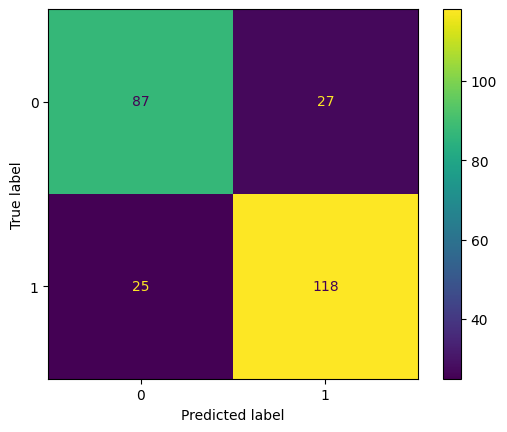

In [419]:
ConfusionMatrixDisplay.from_estimator(log_clf,x_train,y_train)

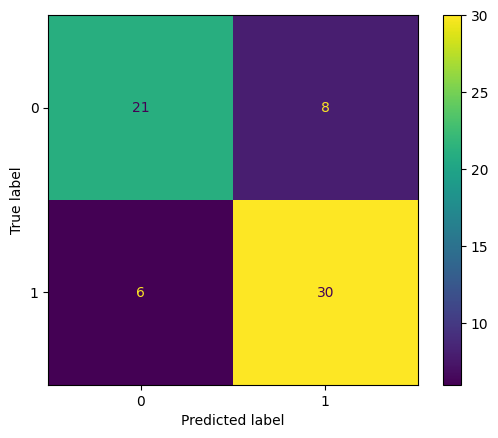

In [422]:
ConfusionMatrixDisplay.from_estimator(log_clf, x_test, y_test)

In [420]:
# Training Data Evaluation

y_pred_train = log_clf.predict(x_train)

cnf_mat = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_mat)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 87  27]
 [ 25 118]]
Accuracy : 0.7976653696498055
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       114
           1       0.81      0.83      0.82       143

    accuracy                           0.80       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.80      0.80       257



In [421]:
# Testing Data Evaluation

y_pred = log_clf.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_mat)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[21  8]
 [ 6 30]]
Accuracy : 0.7846153846153846
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.79      0.83      0.81        36

    accuracy                           0.78        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.78      0.78      0.78        65



### KNN Classifier

In [455]:
knn_clf = KNeighborsClassifier(n_neighbors= 6, p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [456]:
Train_acc = knn_clf.score(x_train,y_train)
Train_acc

0.7470817120622568

In [457]:
Test_acc = knn_clf.score(x_test, y_test)
Test_acc

0.6615384615384615

## Regularization

### lasso regression

In [461]:
log_reg = LogisticRegression(penalty= "l1", solver = "liblinear", C = 1.0)
log_reg.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [462]:
# Training Data Evaluation

y_pred_train = log_reg.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_mat)


accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy Score :",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix : 
 [[ 92  22]
 [ 24 119]]
Accuarcy Score : 0.8210116731517509
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       114
           1       0.84      0.83      0.84       143

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



In [463]:
# Testing Data Evaluation

y_pred = log_reg.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_mat)


accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy Score :",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix : 
 [[21  8]
 [ 5 31]]
Accuarcy Score : 0.8
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.79      0.86      0.83        36

    accuracy                           0.80        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.80      0.80      0.80        65



### Ridge classifier

In [478]:
ridge_model = RidgeClassifier(alpha= 0.096)
ridge_model.fit(x_train,y_train)

RidgeClassifier(alpha=0.096)

In [479]:
# Training data evaluation 
y_pred_train = ridge_model.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_mat)


accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuarcy Score :",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix : 
 [[ 93  21]
 [ 21 122]]
Accuarcy Score : 0.8365758754863813
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.85      0.85      0.85       143

    accuracy                           0.84       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.84      0.84      0.84       257



In [480]:
# Testing data evaluation 
y_pred = ridge_model.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_mat)


accuarcy = accuracy_score(y_test,y_pred)
print("Accuarcy Score :",accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix : 
 [[22  7]
 [ 8 28]]
Accuarcy Score : 0.7692307692307693
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.80      0.78      0.79        36

    accuracy                           0.77        65
   macro avg       0.77      0.77      0.77        65
weighted avg       0.77      0.77      0.77        65



## Decision Tree

In [482]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [483]:
# Training Data Evaluation
y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)
print('*'*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print('*'*50)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[114   0]
 [  0 143]]
**************************************************
Accuracy : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       143

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [485]:
# Testing Data Evaluation
y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)
print('*'*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[24  5]
 [13 23]]
**************************************************
Accuracy : 0.7230769230769231
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.83      0.73        29
           1       0.82      0.64      0.72        36

    accuracy                           0.72        65
   macro avg       0.74      0.73      0.72        65
weighted avg       0.74      0.72      0.72        65



In [489]:
plt.figure(figsize=(200,150))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.savefig("Decision_Tree_Before_Tuning.png")

In [486]:
dt_model.feature_importances_

array([0.256899  , 0.        , 0.112598  , 0.14011074, 0.04650656,
       0.02157044, 0.01247673, 0.03190523, 0.        , 0.11350803,
       0.01839243, 0.04256533, 0.03681842, 0.0118237 , 0.        ,
       0.        , 0.00788247, 0.01050996, 0.        , 0.03192489,
       0.        , 0.        , 0.01632547, 0.0246825 , 0.02612833,
       0.03737177])

<AxesSubplot: >

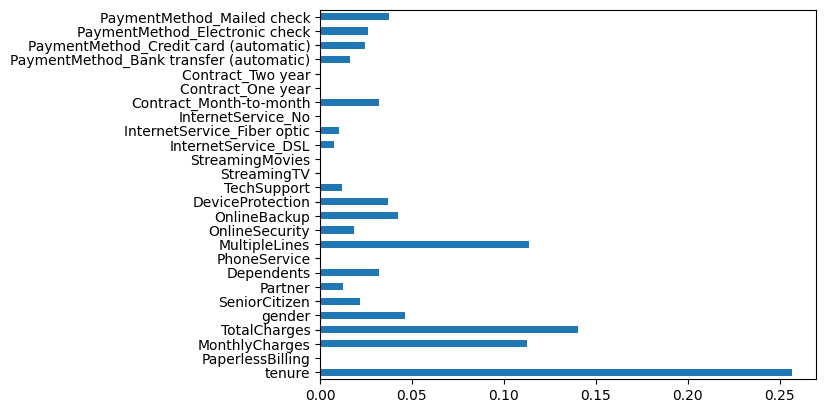

In [487]:
s1 = pd.Series(dt_model.feature_importances_, index= x.columns)
s1.plot(kind = "barh")

### Hyperparameter Tuning

In [495]:
dt_clf = DecisionTreeClassifier(random_state= 15, max_features= None)

Hyperparameter = {"criterion": ["gini","entropy"],
                  "max_depth": np.arange(2,9),
                  "min_samples_split": np.arange(3,15),
                  "min_samples_leaf": np.arange(2,10)}
gscv_df_clf = GridSearchCV(dt_clf,Hyperparameter,cv=4, n_jobs= -1)
gscv_df_clf.fit(x_train,y_train)
gscv_df_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       min_samples_split=3, random_state=15)

In [496]:
# Training Data evaluation
df_clf = DecisionTreeClassifier(random_state= 17,max_features= None)
dt_clf = gscv_df_clf.best_estimator_


dt_clf.fit(x_train,y_train)

y_pred_train = dt_clf.predict(x_train)

cnf_mat = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_mat)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :", accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)


Confusion Matrix :
 [[ 84  30]
 [ 13 130]]
Accuracy Score : 0.7692307692307693
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       114
           1       0.81      0.91      0.86       143

    accuracy                           0.83       257
   macro avg       0.84      0.82      0.83       257
weighted avg       0.84      0.83      0.83       257



In [497]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)
print('*'*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[24  5]
 [ 7 29]]
**************************************************
Accuracy : 0.8153846153846154
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.85      0.81      0.83        36

    accuracy                           0.82        65
   macro avg       0.81      0.82      0.81        65
weighted avg       0.82      0.82      0.82        65



array([0.21260291, 0.        , 0.02289607, 0.03911732, 0.        ,
       0.        , 0.02040056, 0.        , 0.        , 0.10396154,
       0.        , 0.        , 0.        , 0.        , 0.0407331 ,
       0.05460523, 0.        , 0.        , 0.        , 0.        ,
       0.19579973, 0.25555556, 0.        , 0.        , 0.        ,
       0.05432797])

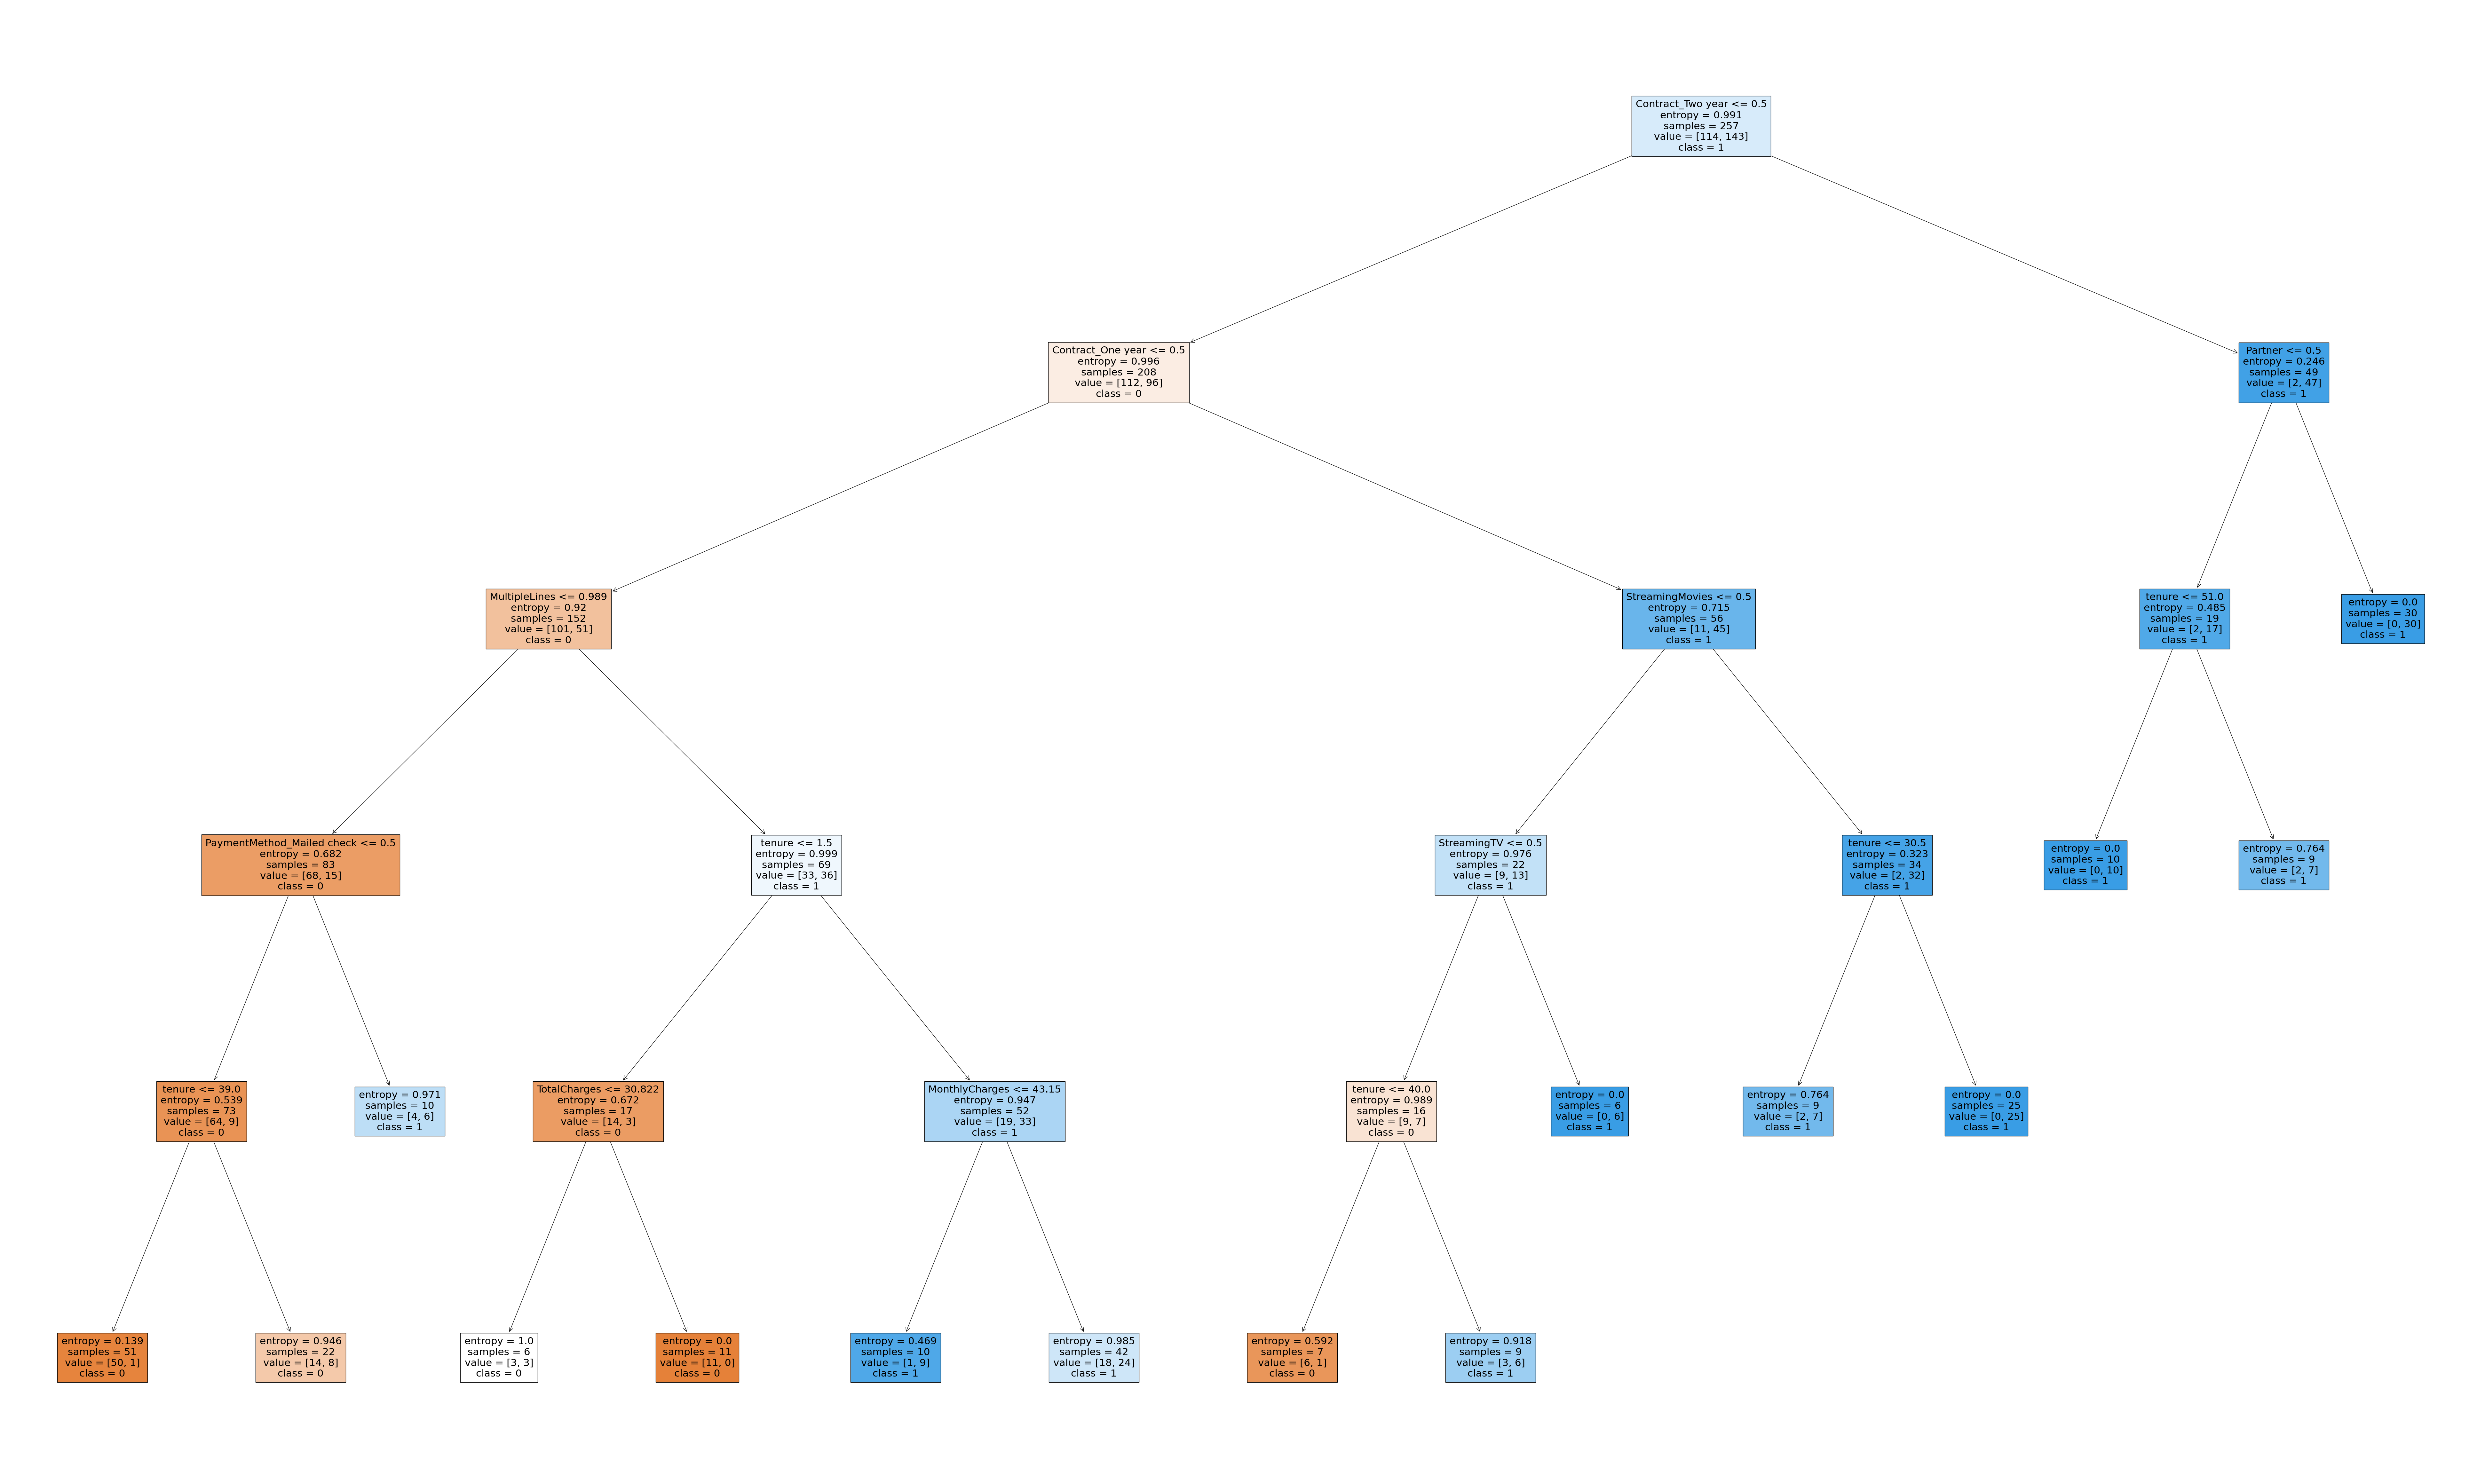

In [499]:
plt.figure(figsize=(100,60))
tree = plot_tree(dt_clf,feature_names= x.columns, class_names= ["0","1"],filled=True)
plt.savefig("Decision_Tree_hyp.png")
dt_clf.feature_importances_

### Pruning

In [526]:
dt_clf_pruning = DecisionTreeClassifier(random_state= 19)
dt_clf_pruning.fit(x_train,y_train)

DecisionTreeClassifier(random_state=19)

In [527]:
result = dt_clf_pruning.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas_list = result["ccp_alphas"]
ccp_alphas_list

array([0.        , 0.00254215, 0.00311284, 0.00324254, 0.00340467,
       0.00350195, 0.00359174, 0.00364786, 0.00370576, 0.00381164,
       0.00415045, 0.00573046, 0.00583658, 0.00583658, 0.00622568,
       0.00667037, 0.00667037, 0.00673775, 0.00691742, 0.00762791,
       0.00765858, 0.00766766, 0.00830091, 0.00973707, 0.01038708,
       0.01055262, 0.01063924, 0.01185844, 0.01255301, 0.01338979,
       0.0157592 , 0.01844796, 0.02492561, 0.049361  , 0.08459478])

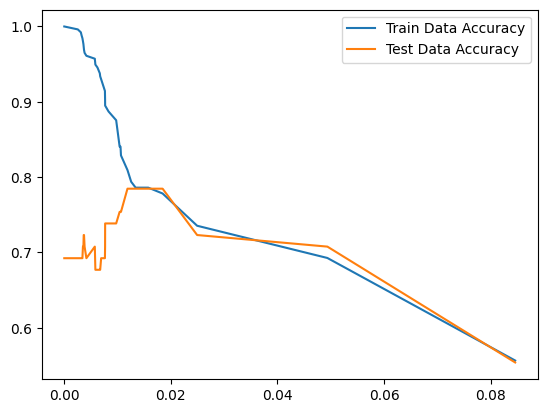

In [528]:
train_acc_list = []
test_acc_list = []
for ccp_alpha in ccp_alphas_list:
    dt_clf_pruning = DecisionTreeClassifier(random_state= 19, ccp_alpha= ccp_alpha)
    dt_clf_pruning.fit(x_train,y_train)
    
    train_acc = dt_clf_pruning.score(x_train,y_train)
    test_acc = dt_clf_pruning.score(x_test,y_test)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
fig,ax = plt.subplots()
ax.plot(ccp_alphas_list, train_acc_list, label = "Train Data Accuracy")
ax.plot(ccp_alphas_list,test_acc_list,label = "Test Data Accuracy")
ax.legend()    
    

In [529]:
max(test_acc_list)
index = np.argmax(test_acc_list)
index

27

In [530]:
print("Train Acc :",train_acc_list[index])
print("Test Acc :",test_acc_list[index])
print("CCP Alpha :",ccp_alphas_list[index])

Train Acc : 0.8093385214007782
Test Acc : 0.7846153846153846
CCP Alpha : 0.011858439874004076


In [531]:
dt_clf_pruning = DecisionTreeClassifier(random_state= 19,ccp_alpha= ccp_alphas_list[index])
dt_clf_pruning.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.011858439874004076, random_state=19)

In [532]:
# Training data Evaluation


y_pred_train = dt_clf_pruning.predict(x_train)

cnf_mat = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_mat)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :", accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)


Confusion Matrix :
 [[ 70  44]
 [  5 138]]
Accuracy Score : 0.7692307692307693
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.93      0.61      0.74       114
           1       0.76      0.97      0.85       143

    accuracy                           0.81       257
   macro avg       0.85      0.79      0.79       257
weighted avg       0.84      0.81      0.80       257



In [533]:
# Testing Data evaluation

y_pred = dt_clf.predict(x_test)

cnf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_mat)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score :", accuarcy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)


Confusion Matrix :
 [[24  5]
 [ 7 29]]
Accuracy Score : 0.7692307692307693
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.85      0.81      0.83        36

    accuracy                           0.82        65
   macro avg       0.81      0.82      0.81        65
weighted avg       0.82      0.82      0.82        65



array([0.50002156, 0.        , 0.        , 0.11844331, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22536042,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0719495 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0842252 ])

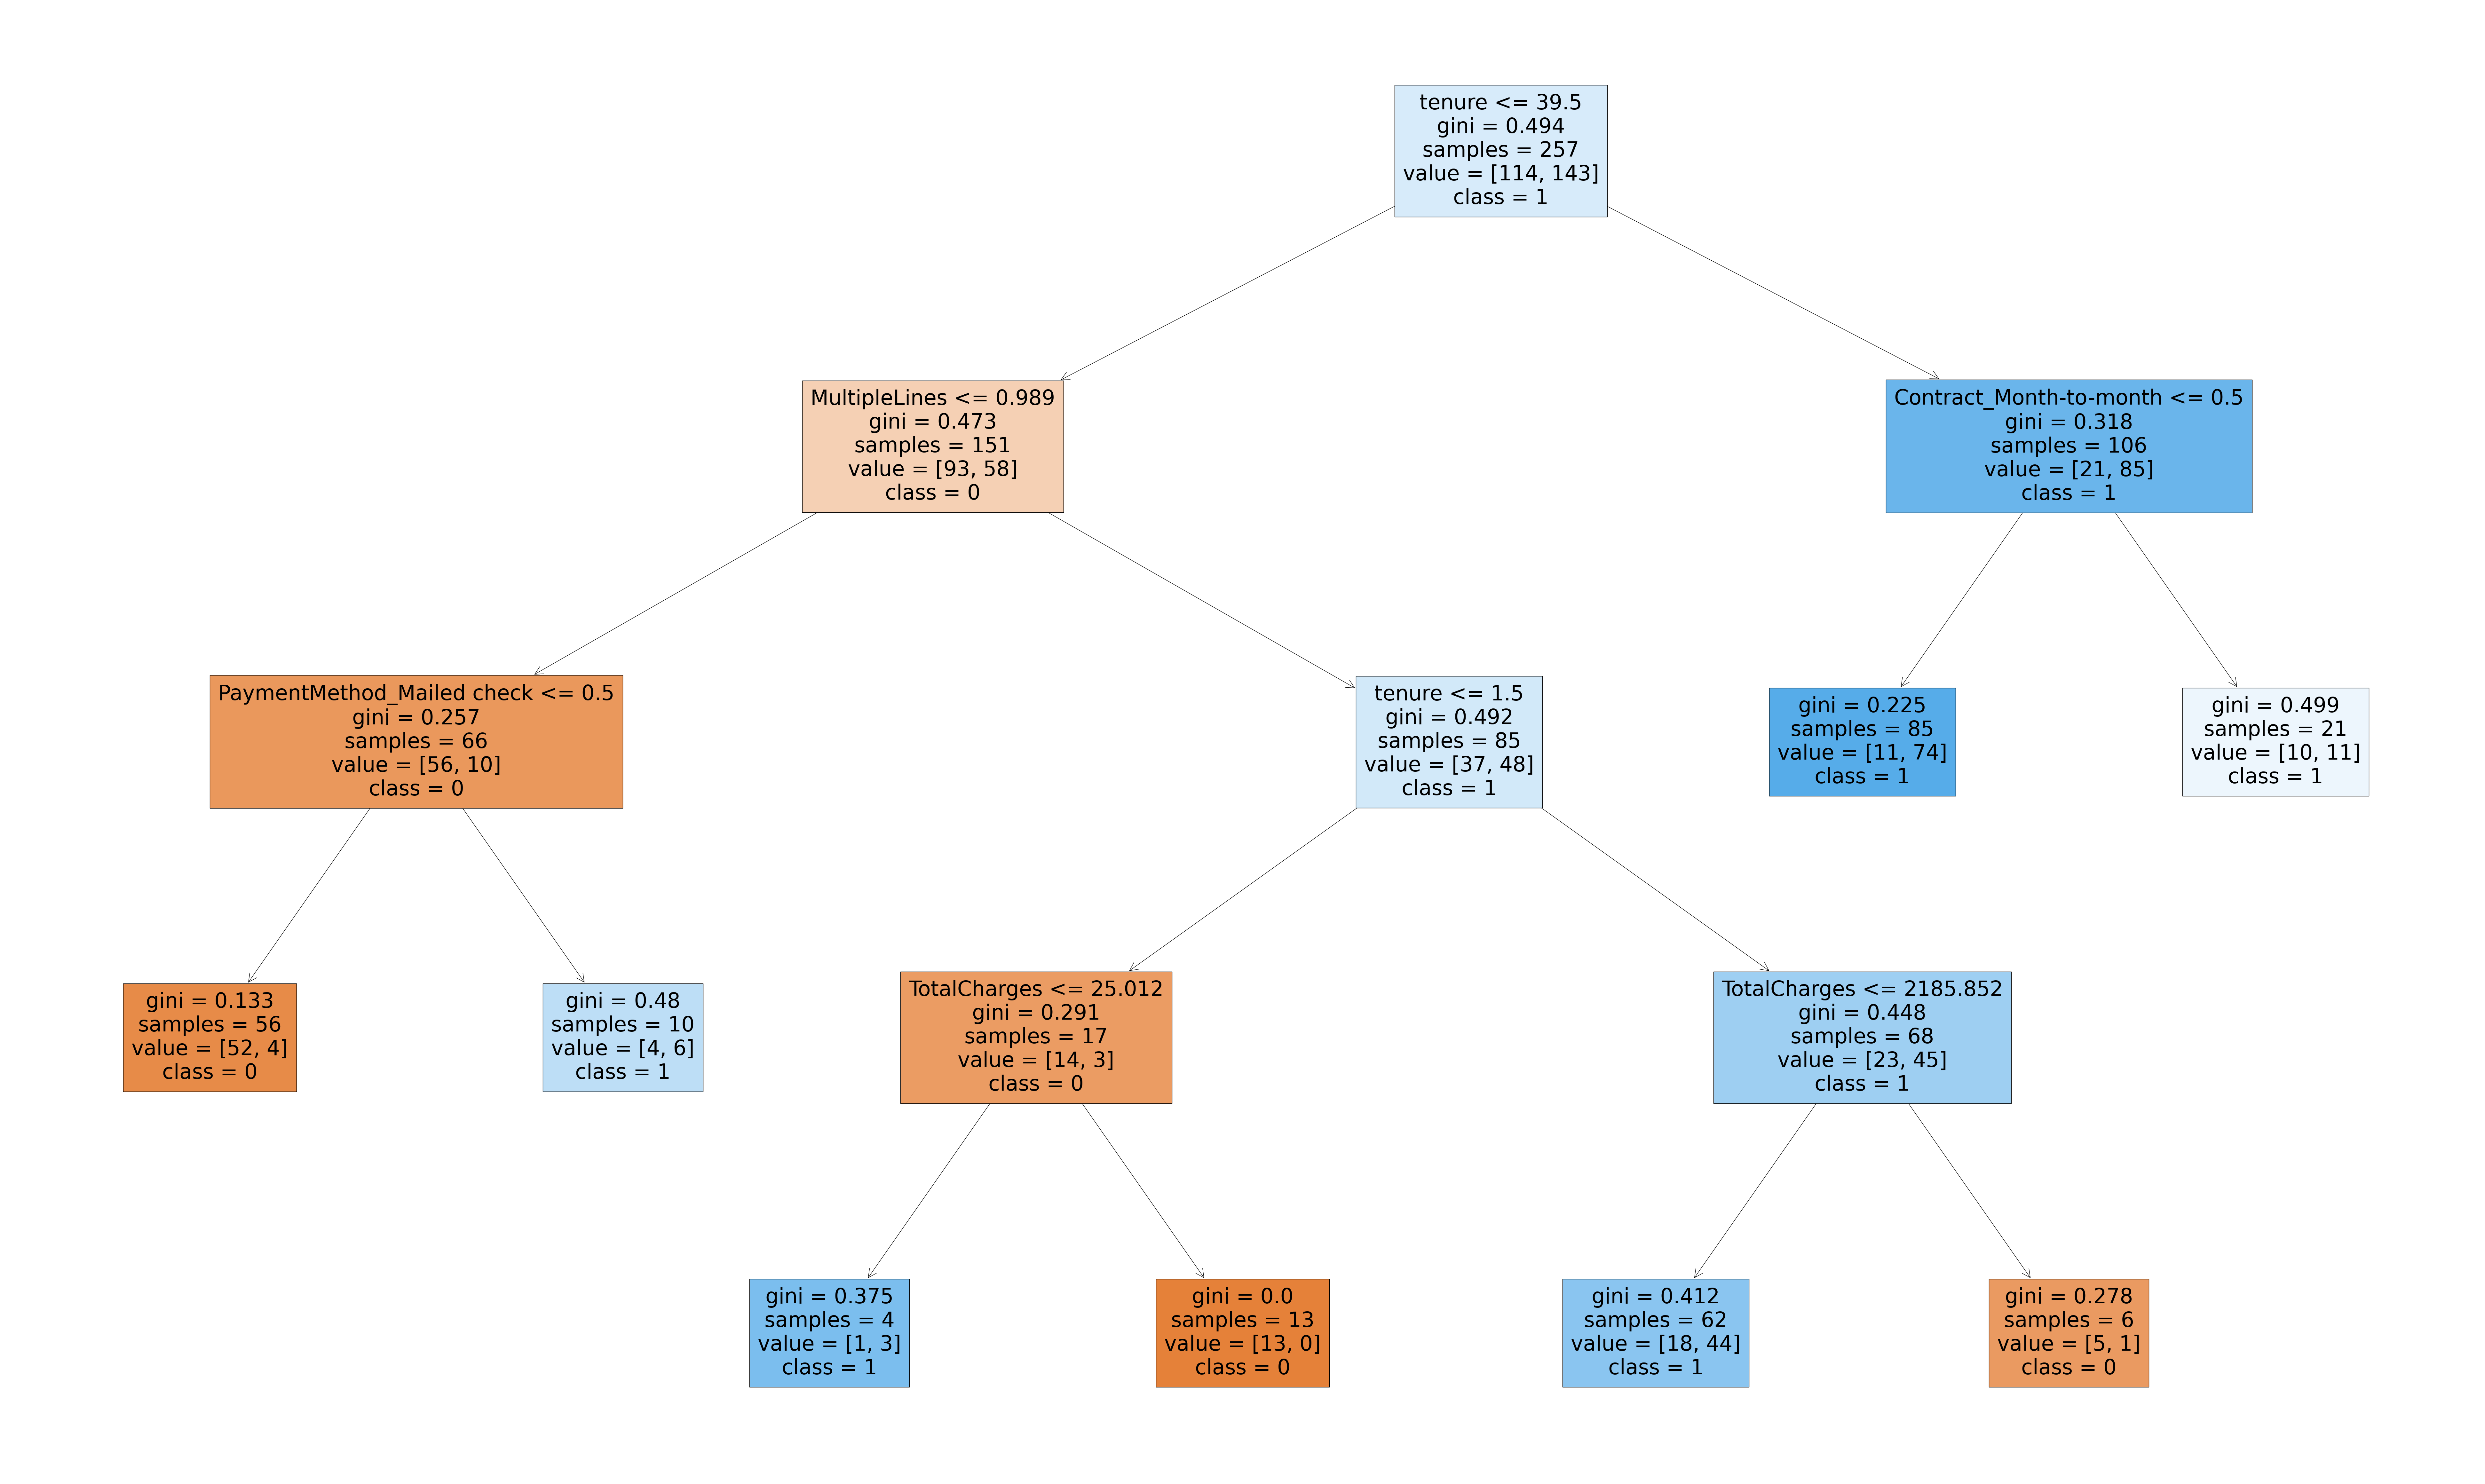

In [534]:
plt.figure(figsize=(100,60))
tree = plot_tree(dt_clf_pruning,feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('Decision_Tree_pruning.png')
dt_clf_pruning.feature_importances_

## Ramdom forest

### Model Training

In [536]:
rf_clf = RandomForestClassifier(random_state= 15)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=15)

### Evaluation 

In [537]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[114   0]
 [  0 143]]
**************************************************
Accuracy : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       143

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [538]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[23  6]
 [ 7 29]]
**************************************************
Accuracy : 0.8
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.83      0.81      0.82        36

    accuracy                           0.80        65
   macro avg       0.80      0.80      0.80        65
weighted avg       0.80      0.80      0.80        65



### Hyperparameter Tuning

In [543]:
rf_clf = RandomForestClassifier(random_state= 15,
                               max_features= "auto",
                               oob_score= False,
                               bootstrap= True,
                               n_jobs= -1)
hyperparameters = {"n_estimators" : np.arange(10,150,10),
                  "criterion" :["gini", "entropy"],
                  "max_depth" : np.arange(3,9),
                  "min_samples_split" : np.arange(4,20),
                  "min_samples_leaf" : np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_clf, hyperparameters, cv = 5)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=3, min_samples_split=15,
                       n_estimators=50, n_jobs=-1, random_state=15)

### Evaluation 

In [549]:
rf_clf = RandomForestClassifier(random_state= 15)
rf_clf = rscv_rf_clf.best_estimator_

rf_clf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=3, min_samples_split=15,
                       n_estimators=50, n_jobs=-1, random_state=15, oob_score= True)

rf_clf.fit(x_train,y_train)

D:\Program Installation\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=3, min_samples_split=15,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=15)

In [550]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 99  15]
 [ 15 128]]
**************************************************
Accuracy : 0.8832684824902723
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.90      0.90      0.90       143

    accuracy                           0.88       257
   macro avg       0.88      0.88      0.88       257
weighted avg       0.88      0.88      0.88       257



In [551]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[22  7]
 [ 4 32]]
**************************************************
Accuracy : 0.8307692307692308
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.82      0.89      0.85        36

    accuracy                           0.83        65
   macro avg       0.83      0.82      0.83        65
weighted avg       0.83      0.83      0.83        65



In [553]:
rf_clf.oob_score_

0.7509727626459144

In [554]:
rf_clf.feature_importances_

array([0.16815994, 0.02123745, 0.11822238, 0.10144185, 0.0152624 ,
       0.01188293, 0.02164963, 0.01730477, 0.0065097 , 0.0504117 ,
       0.00900165, 0.0444733 , 0.00592159, 0.01003692, 0.01574625,
       0.03195438, 0.02244459, 0.01925745, 0.03338203, 0.05975167,
       0.05292   , 0.09391942, 0.02395754, 0.01451329, 0.01577072,
       0.01486644])

<AxesSubplot: >

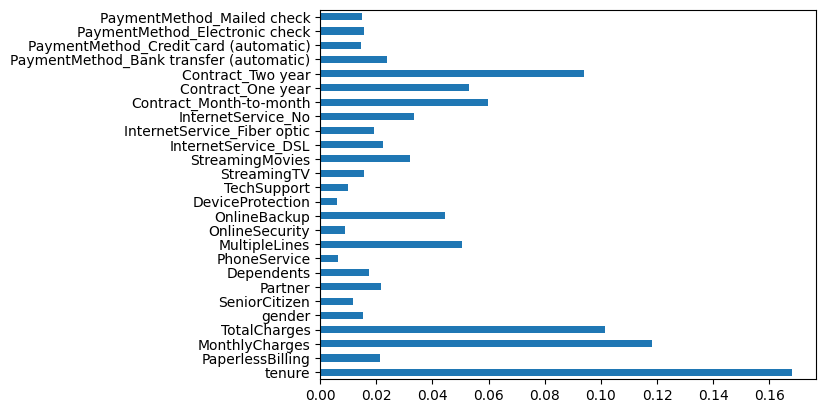

In [555]:
s1 =pd.Series(rf_clf.feature_importances_,index = x.columns)
s1.plot(kind = "barh")